# **이미지 스티칭**

# 특징 디스크립터
이 특징점은 객체의 좌표뿐만 아니라 그 주변 픽셀과의 관계에 대한 정보를 가집니다. 그중 가장 대표적인 것이 size와 angle 속성이며, 코너(corner)점인 경우 코너의 경사도와 방향도 속성으로 가집니다. 특징 디스크립터(feature descriptor)란 특징점 주변 픽셀을 일정한 크기의 블록으로 나누어 각 블록에 속한 픽셀의 그레디언트 히스토그램을 계산한 것입니다. 주로 특징점 주변의 밝기, 색상, 방향, 크기 등의 정보가 포함되어 있습니다. 추출하는 알고리즘에 따라 특징 디스크립터가 일부 달라질 수는 있습니다. 일반적으로 특징점 주변의 블록 크기에 8방향(상, 하, 좌, 우 및 네 방향의 대각선) 경사도를 표현하는 경우가 많습니다. 4 x 4 크기의 블록인 경우 한 개의 특징점당 4 x 4 x 8 = 128개의 값을 갖습니다.

OpenCV는 특징 디스크립터를 추출하기 위해 다음과 같은 함수를 제공합니다.

keypoints, descriptors = detector.compute(image, keypoins, descriptors): 특징점을 전달하면 특징 디스크립터를 계산해서 반환
keypoints, descriptors = detector.detectAndCompute(image, mask, decriptors, useProvidedKeypoints): 특징점 검출과 특징 디스크립터 계산을 한 번에 수행
image: 입력 이미지
keypoints: 디스크립터 계산을 위해 사용할 특징점
descriptors(optional): 계산된 디스크립터
mask(optional): 특징점 검출에 사용할 마스크
useProvidedKeypoints(optional): True인 경우 특징점 검출을 수행하지 않음

# SIFT (Scale-Invariant Feature Transform)

기존의 해리스 코너 검출 알고리즘은 크기 변화에 민감한 문제를 가지고 있었습니다. SIFT는 이미지 피라미드를 이용해서 크기 변화에 따른 특징점 검출 문제를 해결한 알고리즘입니다. OpenCV에서 제공하는 SIFT 객체 생성자는 다음과 같습니다.

detector = cv2.xfeatures2d.SIFT_create(nfeatures, nOctaveLayers, contrastThreshold, edgeThreshold, sigma)
nfeatures: 검출 최대 특징 수
nOctaveLayers: 이미지 피라미드에 사용할 계층 수
contrastThreshold: 필터링할 빈약한 특징 문턱 값
edgeThreshold: 필터링할 엣지 문턱 값
sigma: 이미지 피라미드 0 계층에서 사용할 가우시안 필터의 시그마 값

# SURF (Speeded Up Robust Features)

SIFT는 크기 변화에 따른 특징 검출 문제를 해결하기 위해 이미지 피라미드를 사용하므로 속도가 느리다는 단점이 있습니다. SURF는 이미지 피라미드 대신 필터의 크기를 변화시키는 방식으로 성능을 개선한 알고리즘입니다. SURF는 아래와 같이 생성할 수 있습니다.

detector = cv2.xfeatures2d.SURF_create(hessianThreshold, nOctaves, nOctaveLayers, extended, upright)
hessianThreshold(optional): 특징 추출 경계 값 (default=100)
nOctaves(optional): 이미지 피라미드 계층 수 (default=3)
extended(optional): 디스크립터 생성 플래그 (default=False), True: 128개, False: 64개
upright(optional): 방향 계산 플래그 (default=False), True: 방향 무시, False: 방향 적용

# ORB (Oriented and Rotated BRIEF)
디스크립터 검출기 중 BRIEF(Binary Robust Independent Elementary Features)라는 것이 있습니다. BRIEF는 특징점 검출은 지원하지 않는 디스크립터 추출기입니다. 이 BRIEF에 방향과 회전을 고려하도록 개선한 알고리즘이 바로 ORB입니다. 이 알고리즘은 특징점 검출 알고리즘으로 FAST를 사용하고 회전과 방향을 고려하도록 개선했으며 속도도 빨라 SIFT와 SURF의 좋은 대안으로 사용됩니다. ORB 객체 생성은 다음과 같이 합니다.

detector = cv2.ORB_create(nfeatures, scaleFactor, nlevels, edgeThreshold, firstLevel, WTA_K, scoreType, patchSize, fastThreshold)
nfeatures(optional): 검출할 최대 특징 수 (default=500)
scaleFactor(optional): 이미지 피라미드 비율 (default=1.2)
nlevels(optional): 이미지 피라미드 계층 수 (default=8)
edgeThreshold(optional): 검색에서 제외할 테두리 크기, patchSize와 맞출 것 (default=31)
firstLevel(optional): 최초 이미지 피라미드 계층 단계 (default=0)
WTA_K(optional): 임의 좌표 생성 수 (default=2)
scoreType(optional): 특징점 검출에 사용할 방식 (cv2.ORB_HARRIS_SCORE: 해리스 코너 검출(default), cv2.ORB_FAST_SCORE: FAST 코너 검출)
patchSize(optional): 디스크립터의 패치 크기 (default=31)
fastThreshold(optional): FAST에 사용할 임계 값 (default=20)

# **FULL CODE**

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
#사진은 3장 이상이어야한다.

# 이미지 불러오기
#img1 = cv2.resize(img1, dsize=(640, 480), interpolation=cv2.INTER_AREA)
# 사진 크기는 640,480 통일

img_list = [cv2.imread("파이1.jpg"),cv2.imread("파이2.jpg"),cv2.imread("파이3.jpg"),cv2.imread("파이4.jpg"),cv2.imread("파이5.jpg"),cv2.imread("파이6.jpg")]
for i in range(0,len(img_list)):
  img = cv2.resize(img_list[i], dsize=(640, 480), interpolation=cv2.INTER_AREA)
  img_list[i] =img

# pts 2차원배열 생성
pts_list = np.zeros((len(img_list),2))

def matching(left, right):
  #ORB연산 및 kp 좌표 출력
  img1 = left
  img2 = right
  gray1 = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

  # ORB, BF-Hamming 로 knnMatch  ---①
  detector = cv2.ORB_create()
  kp1, desc1 = detector.detectAndCompute(gray1, None)
  kp2, desc2 = detector.detectAndCompute(gray2, None)
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = matcher.match(desc1, desc2)

  # 매칭 결과를 거리기준 오름차순으로 정렬 ---③
  matches = sorted(matches, key=lambda x:x.distance)
  # 모든 매칭점 그리기 ---④
  res1 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

  # 매칭점으로 원근 변환 및 영역 표시 ---⑤
  src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ])
  dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ])
  # RANSAC으로 변환 행렬 근사 계산 ---⑥
  mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
  
# 정상치 매칭만 그리기 ---⑦
  matchesMask = mask.ravel().tolist()
  res2 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    matchesMask = matchesMask,
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  # 모든 매칭점과 정상치 비율 ---⑧
  accuracy=float(mask.sum()) / mask.size
  print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))

  from google.colab.patches import cv2_imshow
  cv2_imshow(res2)

  # 특징점 좌표 정렬 ---⑨
  result_kp1 = sorting(matchesMask, src_pts)
  result_kp2 = sorting(matchesMask, dst_pts)

  result_kp1 = sorted(result_kp1, key=lambda x: x[0], reverse=True)
  result_kp2 = sorted(result_kp2, key=lambda x: x[0], reverse=True)
  
  # x좌표 최대값 추출
  extraction = [result_kp1[0][0],result_kp2[0][0]]
  print(extraction)
  return extraction

def roi(img_list, pts_list):
  # 사진 자르기
  # roi_list에 저장
  roi_list = []
  for i in range(0,len(img_list)):
    
    if int(pts_list[i][1]) == 0:
      roi_img = img_list[i][0:480,int(pts_list[i][0]):680]
    else:
      roi_img = img_list[i][0:480,int(pts_list[i][0]):int(pts_list[i][1])]
    roi_list.append(roi_img)
  return roi_list

def sorting(mask, kp):
  result = []
  for i in range(len(mask)):
    if mask[i] == 1:
        result.append(kp[i])
  return result

def concat(roi_list):  
  flag = roi_list[0]

  for i in range(1,len(roi_list)):
    if i == 0:
      flag = cv2.hconcat(roi_list[i-1],roi_list[i])
    else:
      flag = cv2.hconcat([flag,roi_list[i]])
  return flag

for i in range(1,len(img_list)):
  
  # ORB로 특징점을 검출한 뒤 좌표 저장
  compared_list = matching(img_list[i-1],img_list[i])
  
  # roi좌표 리스트에 저장(재배치)
  pts_list[i-1][1] = compared_list[0]
  pts_list[i][0] = compared_list[1]
  print(pts_list)


#roi 진행 후 저장
roi_list = roi(img_list, pts_list)
#사진 합성
result = concat(roi_list)

from google.colab.patches import cv2_imshow      
cv2_imshow(result)


# **Function Description**



In [37]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
#사진은 3장 이상이어야한다.

# 이미지 불러오기
#img1 = cv2.resize(img1, dsize=(640, 480), interpolation=cv2.INTER_AREA)
# 사진 크기는 640,480 통일

img_list = [cv2.imread("파이1.jpg"),cv2.imread("파이2.jpg"),cv2.imread("파이3.jpg"),cv2.imread("파이4.jpg"),cv2.imread("파이5.jpg"),cv2.imread("파이6.jpg")]
for i in range(0,len(img_list)):
  img = cv2.resize(img_list[i], dsize=(640, 480), interpolation=cv2.INTER_AREA)
  img_list[i] =img

# pts 2차원배열 생성
pts_list = np.zeros((len(img_list),2))

accuracy: 131/213(0.62%)


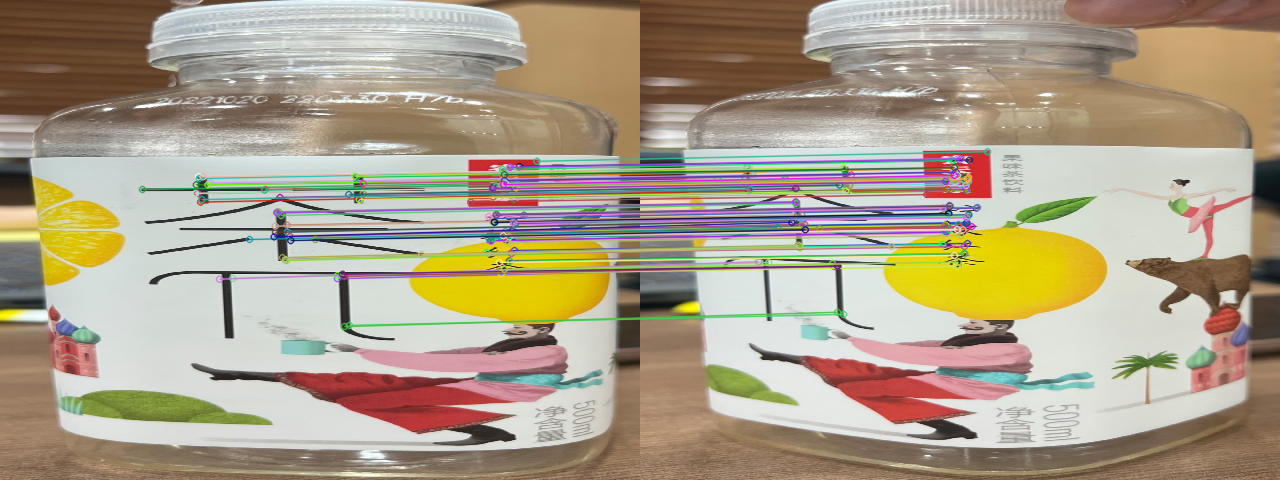

[536.4, 347.04]
[[  0.         536.40002441]
 [347.04000854   0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]]
accuracy: 57/158(0.36%)


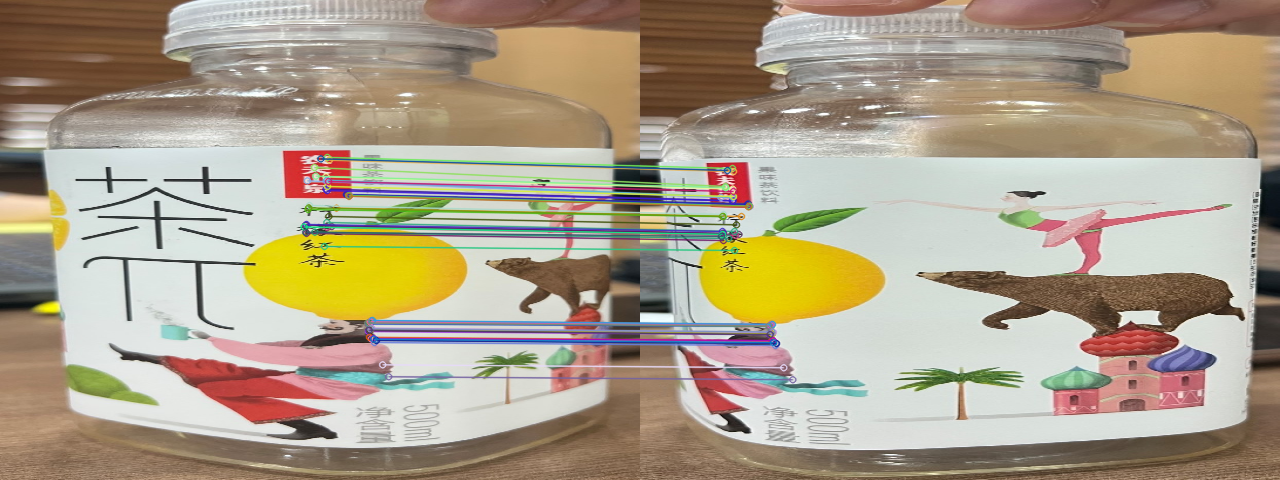

[388.17804, 152.28522]
[[  0.         536.40002441]
 [347.04000854 388.17803955]
 [152.28521729   0.        ]
 [  0.           0.        ]
 [  0.           0.        ]
 [  0.           0.        ]]
accuracy: 84/157(0.54%)


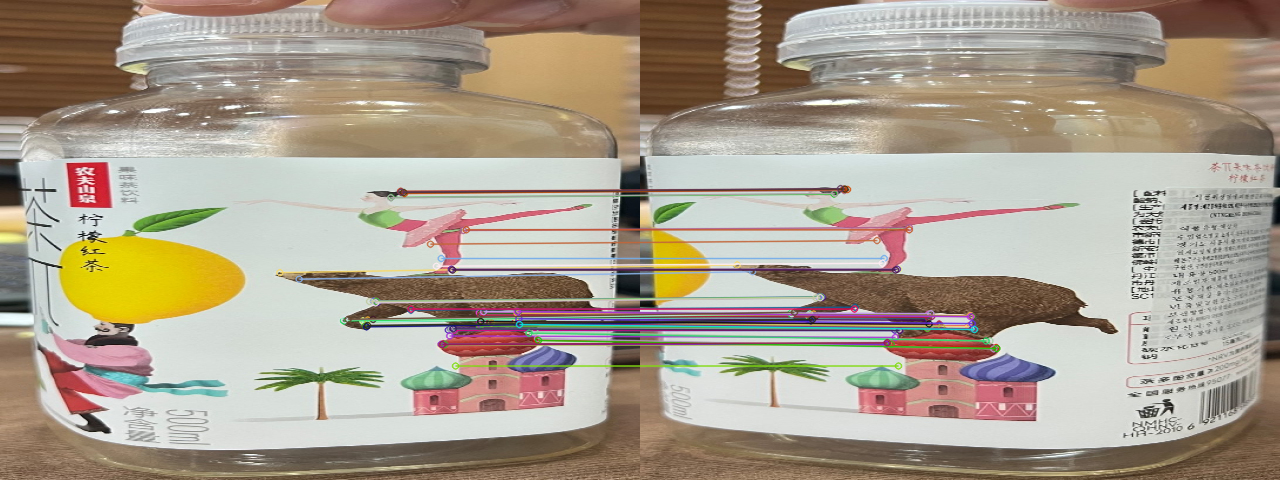

[538.0, 356.40002]
[[  0.         536.40002441]
 [347.04000854 388.17803955]
 [152.28521729 538.        ]
 [356.40002441   0.        ]
 [  0.           0.        ]
 [  0.           0.        ]]
accuracy: 34/133(0.26%)


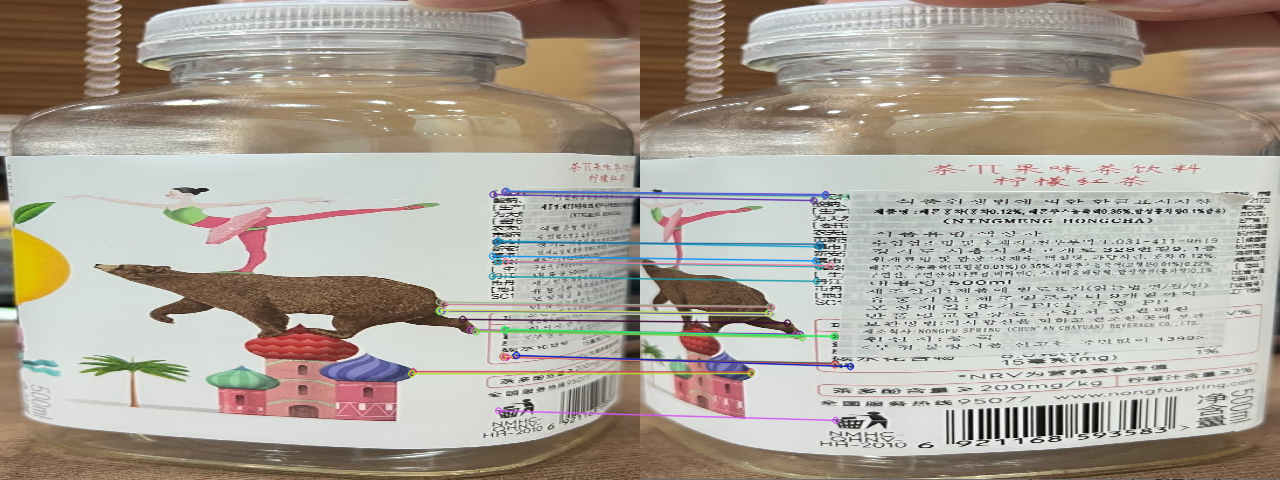

[524.62085, 210.00002]
[[  0.         536.40002441]
 [347.04000854 388.17803955]
 [152.28521729 538.        ]
 [356.40002441 524.62084961]
 [210.00001526   0.        ]
 [  0.           0.        ]]
accuracy: 61/154(0.40%)


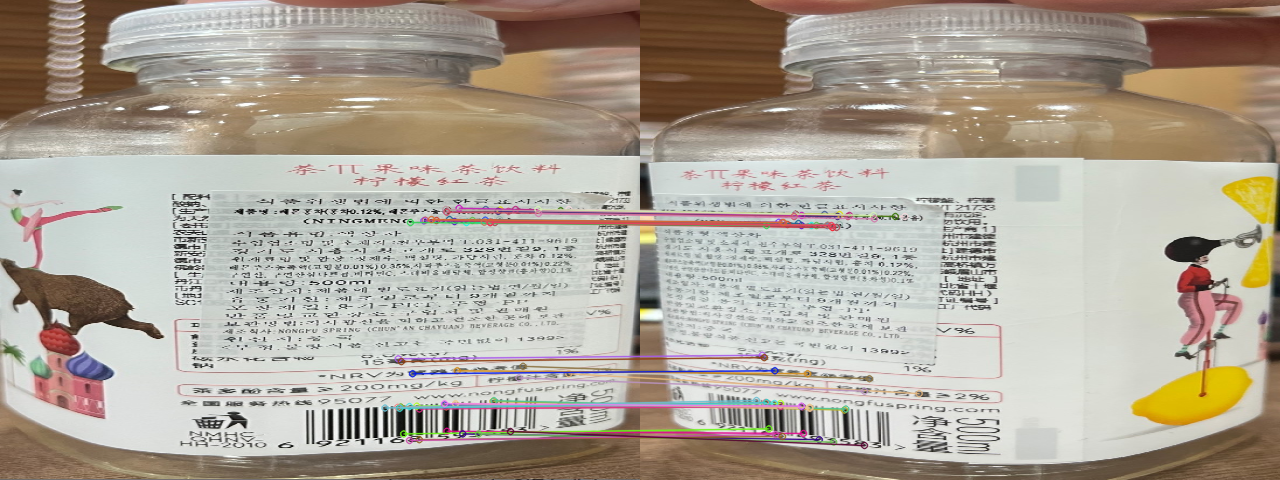

[568.512, 278.6919]
[[  0.         536.40002441]
 [347.04000854 388.17803955]
 [152.28521729 538.        ]
 [356.40002441 524.62084961]
 [210.00001526 568.51202393]
 [278.69189453   0.        ]]


In [38]:
def matching(left, right):
  #ORB연산 및 kp 좌표 출력
  img1 = left
  img2 = right
  gray1 = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

  # ORB, BF-Hamming 로 knnMatch  ---①
  detector = cv2.ORB_create()
  kp1, desc1 = detector.detectAndCompute(gray1, None)
  kp2, desc2 = detector.detectAndCompute(gray2, None)
  matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
  matches = matcher.match(desc1, desc2)

  # 매칭 결과를 거리기준 오름차순으로 정렬 ---③
  matches = sorted(matches, key=lambda x:x.distance)
  # 모든 매칭점 그리기 ---④
  res1 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                      flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

  # 매칭점으로 원근 변환 및 영역 표시 ---⑤
  src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ])
  dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ])
  # RANSAC으로 변환 행렬 근사 계산 ---⑥
  mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
  
# 정상치 매칭만 그리기 ---⑦
  matchesMask = mask.ravel().tolist()
  res2 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    matchesMask = matchesMask,
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  # 모든 매칭점과 정상치 비율 ---⑧
  accuracy=float(mask.sum()) / mask.size
  print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))

  from google.colab.patches import cv2_imshow
  cv2_imshow(res2)

  # 특징점 좌표 정렬 ---⑨
  result_kp1 = sorting(matchesMask, src_pts)
  result_kp2 = sorting(matchesMask, dst_pts)

  result_kp1 = sorted(result_kp1, key=lambda x: x[0], reverse=True)
  result_kp2 = sorted(result_kp2, key=lambda x: x[0], reverse=True)
  
  # x좌표 최대값 추출
  extraction = [result_kp1[0][0],result_kp2[0][0]]
  print(extraction)
  return extraction


def sorting(mask, kp):
  result = []
  for i in range(len(mask)):
    if mask[i] == 1:
        result.append(kp[i])
  return result

for i in range(1,len(img_list)):
  
  # ORB로 특징점을 검출한 뒤 좌표 저장
  compared_list = matching(img_list[i-1],img_list[i])
  
  # roi좌표 리스트에 저장(재배치)
  pts_list[i-1][1] = compared_list[0]
  pts_list[i][0] = compared_list[1]
  print(pts_list)

height::480 width ::1851


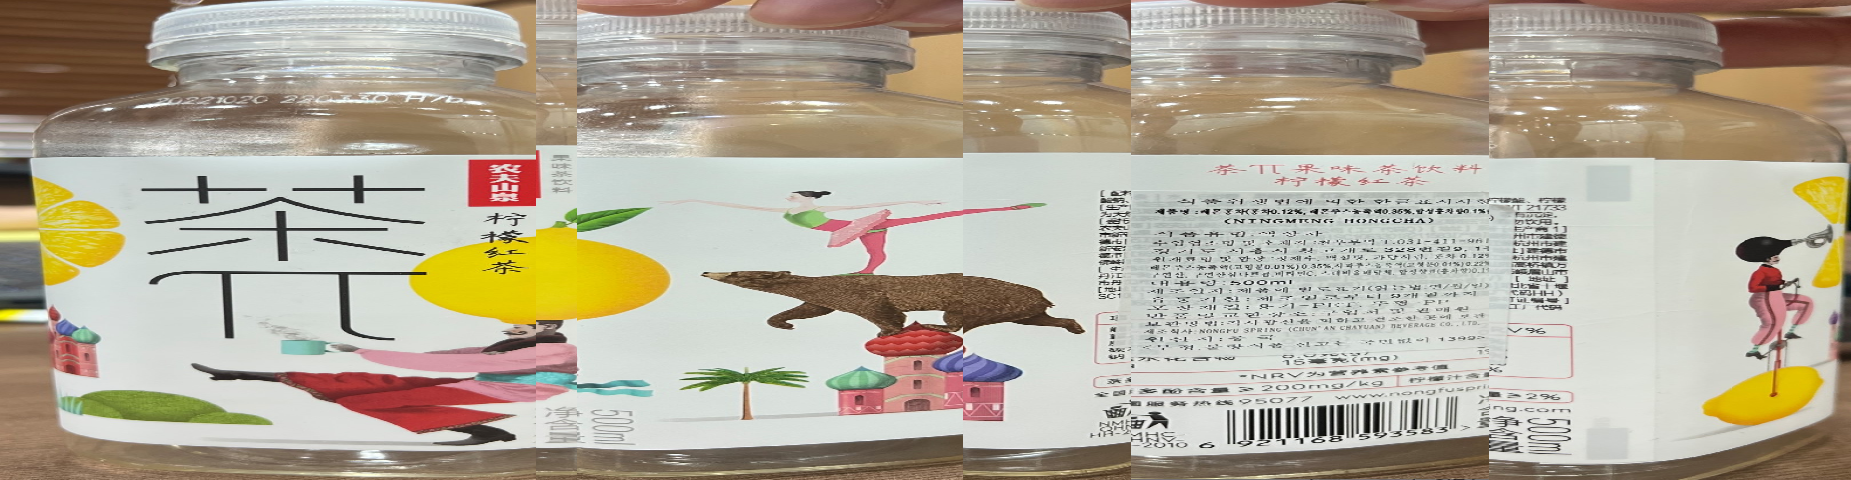

In [46]:
def roi(img_list, pts_list):
  # 사진 자르기
  # roi_list에 저장
  roi_list = []
  for i in range(0,len(img_list)):
    
    if int(pts_list[i][1]) == 0:
      roi_img = img_list[i][0:480,int(pts_list[i][0]):680]
    else:
      roi_img = img_list[i][0:480,int(pts_list[i][0]):int(pts_list[i][1])]
    roi_list.append(roi_img)
  return roi_list

def concat(roi_list):  
  flag = roi_list[0]

  for i in range(1,len(roi_list)):
    if i == 0:
      flag = cv2.hconcat(roi_list[i-1],roi_list[i])
    else:
      flag = cv2.hconcat([flag,roi_list[i]])
  return flag

#roi 진행 후 저장
roi_list = roi(img_list, pts_list)
#사진 합성
result = concat(roi_list)
height, width,_ = result.shape
print(f"height::{str(height)} width ::{str(width)}")
cv2.imwrite("result.jpg",result)

from google.colab.patches import cv2_imshow      
cv2_imshow(result)


accuracy: 11/142(0.08%)


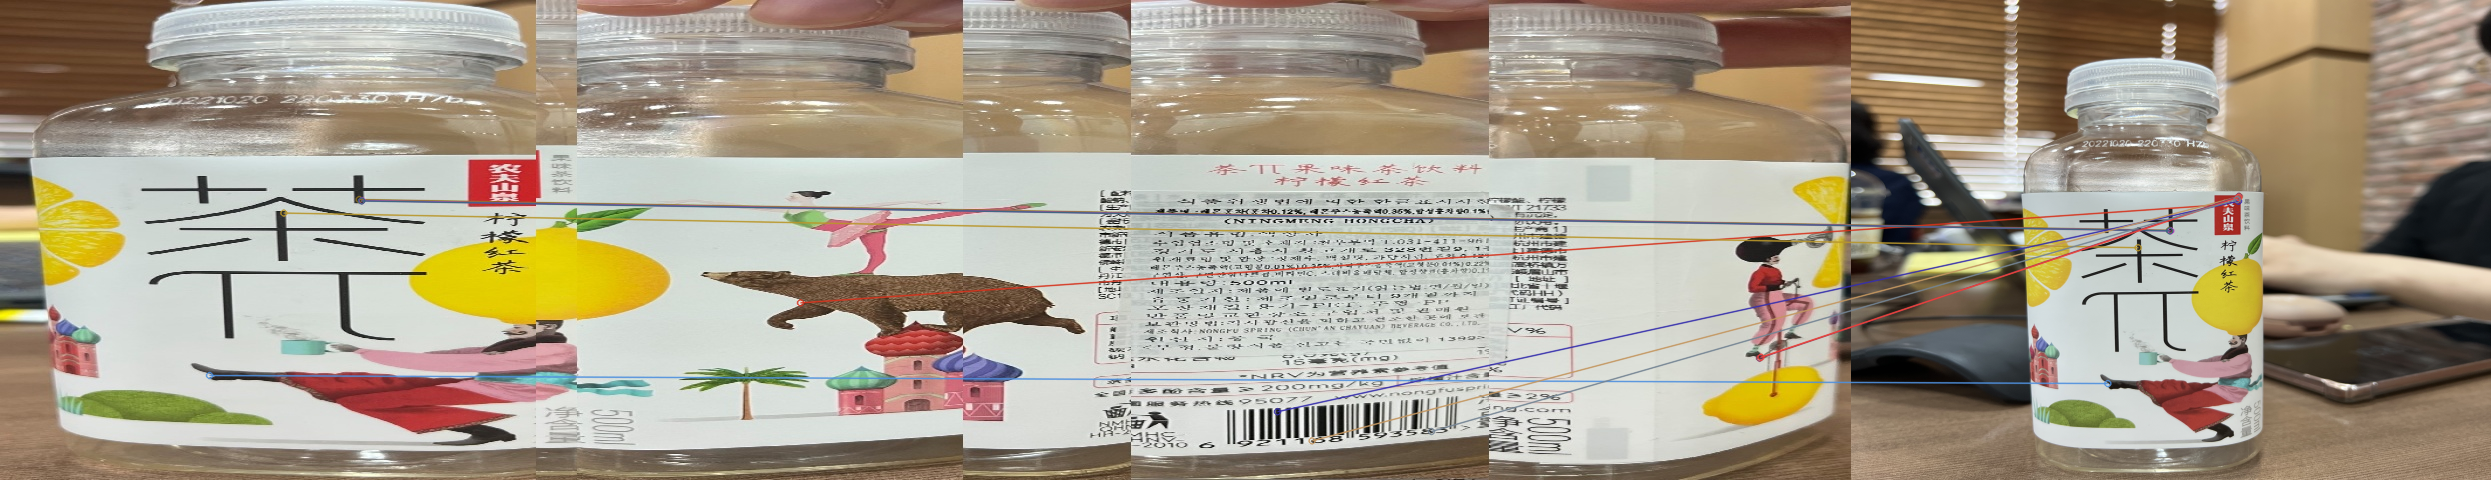

In [49]:
import cv2, numpy as np

img1 = cv2.imread('result.jpg')
img2 = cv2.imread('음료1.jpg')
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
# ORB, BF-Hamming 로 knnMatch  ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리기준 오름차순으로 정렬 ---③
matches = sorted(matches, key=lambda x:x.distance)
# 모든 매칭점 그리기 ---④
res1 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 매칭점으로 원근 변환 및 영역 표시 ---⑤
src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ])
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ])
# RANSAC으로 변환 행렬 근사 계산 ---⑥
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h,w = img1.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
dst = cv2.perspectiveTransform(pts,mtrx)
# img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

# 정상치 매칭만 그리기 ---⑦
matchesMask = mask.ravel().tolist()
res2 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    matchesMask = matchesMask,
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 모든 매칭점과 정상치 비율 ---⑧
accuracy=float(mask.sum()) / mask.size
print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))

# 결과 출력                    
from google.colab.patches import cv2_imshow      

cv2_imshow(res2)